In [1]:
import pandas as pd
import uproot
import os
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#input_file = '/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v3/ntuple_selection_sim_proton_v7_em_beamen50_1.root'
input_file = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v3/ntuple_selection_data_em_435.root'
for array_i in uproot.iterate(input_file + ":relevant_branches", step_size="10MB", library="ak",# filter_name=["event", "ce_clean_*"]
    ):
    array = array_i
    break

In [13]:
array

<Array [{event: 1281, run: 435, ...}, ...] type='685 * {event: uint32, run:...'>

In [20]:
#input_file = '/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v3/ntuple_selection_sim_proton_v7_em_beamen50_1.root'
input_file = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v3/ntuple_selection_data_em_435.root'
df = None
for array_i in uproot.iterate(input_file + ":relevant_branches", step_size="100MB", library="ak", 
        filter_name=["event", "ce_clean_detid", "ce_clean_x_unshifted", "ce_clean_y_unshifted", "ce_clean_layer", "ce_clean_x_shifted", "ce_clean_y_shifted"]):
    new_df = ak.to_dataframe(array_i, levelname=lambda i : {0 : "event_internal_id", 1:"rechit_id"}[i])
    if df is None:
        df = new_df.drop_duplicates(["ce_clean_detid"])
    else:
        df = pd.concat([df, new_df]).drop_duplicates(["ce_clean_detid"])

In [22]:
pd.options.display.max_columns = 50
pd.options.display.min_rows = 50
df.sort_values(["ce_clean_layer", "ce_clean_detid"])

event  ce_clean_detid  ce_clean_x_unshifted   
event_internal_id rechit_id                                                
3                 0           1284        16777216             -0.000009  \
                  1           1284        16777275             -0.000009   
19                0           1300        16777276             -0.000009   
3                 2           1284        16777277             -0.000009   
1                 0           1282        16777278             -0.000009   
3                 4           1284        16777279             -0.000009   
                  5           1284        16777280             -0.974487   
172               0           1453        16777338             -0.974487   
3                 6           1284        16777340             -0.974487   
1                 1           1282        16777341             -0.974487   
3                 8           1284        16777342             -0.974487   
                  9           1284        16777343             -0.974487   
172               1           1453        16777402             -1.948975   
1                 2           1282        16777403             -1.948975   
                  3           1282        16777405             -1.948975   
0                 0           1281        16777406             -1.948975   
3                 13          1284        16777407             -1.948975   
                  14          1284        16777466             -2.923340   
                  15          1284        16777467             -2.923340   
0                 1           1281        16777468             -2.923340   
2                 3           1283        16777469             -2.923340   
0                 2           1281        16777470             -2.923340   
3                 18          1284        16777471             -2.923340   
113               3           1394        16777472             -3.897949   
40                9           1321        16777530             -3.897949   
...                            ...             ...                   ...   
69                899         1350       469766139              0.974487   
0                 1059        1281       469766141              0.974487   
5                 1120        1286       469766142              0.974487   
0                 1060        1281       469766143              0.974487   
413               1042        1697       470814654              1.948975   
205               1156        1487       471859269             -0.974487   
40                1114        1321       471859322             -0.974487   
26                1061        1307       471859521             -4.872070   
38                1083        1319       471859578             -4.872070   
25                1115        1306       471859643             -5.846680   
42                1180        1323       471859647             -5.846680   
24                1052        1305       471862913              5.846680   
193               1092        1475       471862917              5.846680   
103               1076        1384       471862982              4.872070   
58                1052        1339       471863039              4.872070   
27                1123        1308       471863238              0.974487   
0                 1061        1281       471863292              0.974487   
26                1063        1307       472908025             -2.923340   
178               1123        1459       472908035             -3.897949   
41                1027        1322       472908284             -6.821289   
51                1135        1332       472911428              6.821289   
136               1072        1417       472911623              3.897949   
319               1034        1603       472911740              2.923340   
3                 1375        1284       473956417             -0.974487   
12                1042        1293       473960382              1.948975   



In [23]:
df[df.ce_clean_layer == 1]

event  ce_clean_detid  ce_clean_x_unshifted   
event_internal_id rechit_id                                                
0                 0           1281        16777406             -1.948975  \
                  1           1281        16777468             -2.923340   
                  2           1281        16777470             -2.923340   
                  3           1281        16777660             -5.846680   
1                 0           1282        16777278             -0.000009   
                  1           1282        16777341             -0.974487   
                  2           1282        16777403             -1.948975   
                  3           1282        16777405             -1.948975   
                  5           1282        16777533             -3.897949   
                  6           1282        16781247              1.948975   
                  7           1282        18874491             -0.974487   
2                 3           1283        16777469             -2.923340   
3                 0           1284        16777216             -0.000009   
                  1           1284        16777275             -0.000009   
                  2           1284        16777277             -0.000009   
                  4           1284        16777279             -0.000009   
                  5           1284        16777280             -0.974487   
                  6           1284        16777340             -0.974487   
                  8           1284        16777342             -0.974487   
                  9           1284        16777343             -0.974487   
                  13          1284        16777407             -1.948975   
                  14          1284        16777466             -2.923340   
                  15          1284        16777467             -2.923340   
                  18          1284        16777471             -2.923340   
                  20          1284        16777534             -3.897949   
...                            ...             ...                   ...   
94                1           1375        16780993              4.872070   
96                3           1377        16780996              4.872070   
104               7           1385        16781122              2.923340   
113               3           1394        16777472             -3.897949   
132               7           1413        16777662             -5.846680   
144               1           1425        16780994              4.872070   
147               2           1428        16781183              2.923340   
151               7           1432        16781060              3.897949   
160               7           1441        16780995              4.872070   
172               0           1453        16777338             -0.974487   
                  1           1453        16777402             -1.948975   
                  3           1453        18874815             -5.846680   
197               6           1479        16781121              2.923340   
200               20          1482        18878150              4.872070   
203               9           1485        16781187              1.948975   
292               9           1576        19923453             -6.821289   
324               2           1608        16780931              5.846680   
338               3           1622        18878459              0.974487   
356               4           1640        16780997              4.872070   
436               5           1720        16781244              1.948975   
630               9           1919        19926908              2.923340   
654               8           2583        16781119              3.897949   
801               4           2731        16780930              5.846680   
811               7           2741        18878085              5.846680   
845               3           2777        19926791              3.897949   



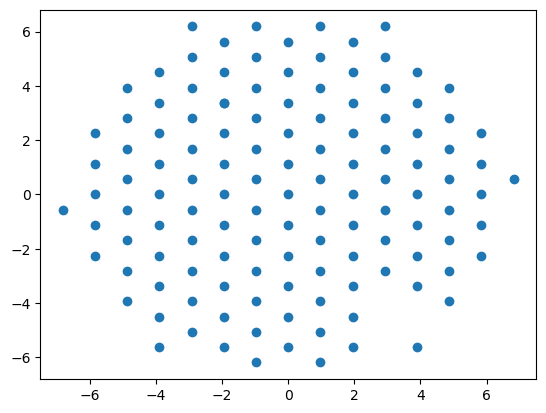

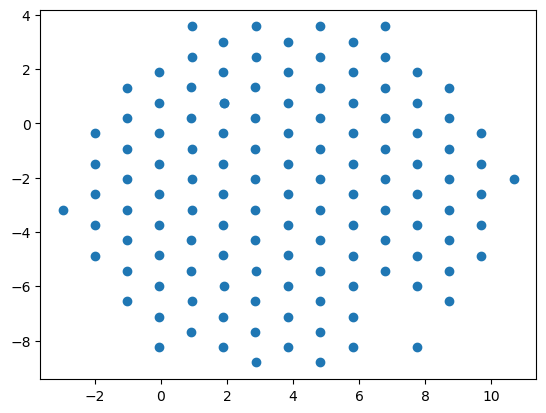

In [36]:
df_plot = df[df.ce_clean_layer == 11]
plt.figure()
plt.scatter(df_plot.ce_clean_x_unshifted, df_plot.ce_clean_y_unshifted)
plt.figure()
plt.scatter(df_plot.ce_clean_x_shifted, df_plot.ce_clean_y_shifted)